In [1]:
 # for data manipulation
import pandas as pd
# for mathematical calculation
import numpy as np
 #for plotting graph
import matplotlib.pyplot as plt
# for data visualisation
import seaborn as sns   

#import preprocessing module
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor


# Data Loading

In [2]:
dataTest = pd.read_csv('Test_v2.csv')
dataTest.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [3]:
dataTrain = pd.read_csv('Train_v2.csv')
dataTrain.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# Information about our test and train data

In [4]:
#we have 3 features of integer data and 8 features of an object data type
print(dataTest.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
country                   10086 non-null object
year                      10086 non-null int64
uniqueid                  10086 non-null object
location_type             10086 non-null object
cellphone_access          10086 non-null object
household_size            10086 non-null int64
age_of_respondent         10086 non-null int64
gender_of_respondent      10086 non-null object
relationship_with_head    10086 non-null object
marital_status            10086 non-null object
education_level           10086 non-null object
job_type                  10086 non-null object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB
None


In [5]:
#we have 3 features of integer data and 9 features of an object data type
print(dataTrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [6]:
dataTrain.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [7]:
dataTest.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [8]:
#Data types with the object column in our dataframe are categorical dataset
dataTest.dtypes

country                   object
year                       int64
uniqueid                  object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [9]:
dataTrain.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

# Dropping Columns

In [10]:
dataTrain.drop(['uniqueid'], axis=1, inplace=True)
dataTrain.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [11]:
dataTest.drop(['uniqueid'], axis=1, inplace=True)
dataTest.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [12]:
#
print(len(dataTrain.columns))
print(len(dataTest.columns))

12
11


# Counts the features in the column

In [13]:
dataTrain['country'].value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [14]:
dataTrain['year'].value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

In [15]:
dataTrain['location_type'].value_counts()

Rural    14343
Urban     9181
Name: location_type, dtype: int64

In [16]:
dataTrain['cellphone_access'].value_counts()

Yes    17454
No      6070
Name: cellphone_access, dtype: int64

In [17]:
dataTrain['household_size'].value_counts()

2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
18       1
17       1
20       1
21       1
Name: household_size, dtype: int64

In [18]:
dataTrain['age_of_respondent'].value_counts()

30    1056
35     836
25     792
28     748
32     715
      ... 
91       5
93       4
96       3
99       2
97       1
Name: age_of_respondent, Length: 85, dtype: int64

In [19]:
dataTrain['gender_of_respondent'].value_counts()

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

In [20]:
dataTrain['relationship_with_head'].value_counts()

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64

In [21]:
dataTrain['marital_status'].value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

In [22]:
dataTrain['education_level'].value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

In [23]:
dataTrain['job_type'].value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

# Split data into Train and Test

In [24]:
#Separate training features from target
X = dataTrain.drop(['bank_account'], axis='columns')

In [25]:
#predictive target
y = dataTrain['bank_account']

In [26]:
#using get dummies function from pandas to encode our categorical data
# Convert training features to numerical Data
X = pd.get_dummies(X)

In [27]:
#preview the encoded predictive features data
X.head()

,year,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cellphone_access_No,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,3,24,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,5,70,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2018,5,26,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2018,5,34,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,8,26,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [28]:
#Encode the Test dataset
Y = pd.get_dummies(dataTest)

In [29]:
#preview the test data
Y.head()

,year,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cellphone_access_No,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,3,30,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2018,7,51,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2018,3,77,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2018,6,39,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2018,3,16,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [30]:
#split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state = 0)

# Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
# Initialize logisticregression
logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
#predict model
logisticmodel.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [34]:
logistic_predict = logisticmodel.predict(X_test)

In [35]:
def ConfusionMatrix (ytest,ypred, label=['Positive','Negative']):
    from sklearn.metrics import confusion_matrix
    cm= confusion_matrix (ytest, ypred)
    plt.figure(figsize =(7,5))
    sns.heatmap(cm,annot=True,fmt='d', cbar='VlGn')
    plt.xlabel('predicted', fontsize=13)
    plt.xticks([0.5,1.5], label)
    plt.yticks([0.5,1.5], label)
    plt.ylabel('Truth', fontsize=13)
    plt.title('A Confusion Matrix');

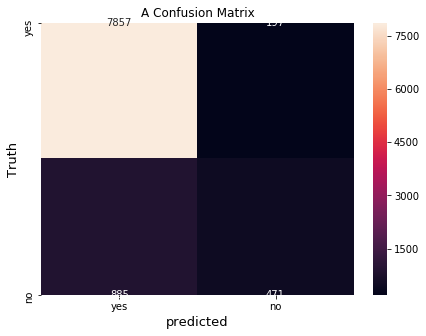

In [36]:
ConfusionMatrix(y_test, logistic_predict, label=['yes', 'no'])

In [38]:
metrics.accuracy_score(y_test, logistic_predict)

0.8850159404888417

# submission file

In [40]:
submissionfile = pd.read_csv('SubmissionFile.csv')
submissionfile.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0


In [41]:
submissionfile['bank_account'] = y

In [42]:
submissionfile.head(10)

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,Yes
1,uniqueid_6722 x Kenya,No
2,uniqueid_6714 x Kenya,Yes
3,uniqueid_8103 x Kenya,No
4,uniqueid_8657 x Kenya,No
5,uniqueid_7407 x Kenya,No
6,uniqueid_8440 x Kenya,No
7,uniqueid_6637 x Kenya,No
8,uniqueid_8506 x Kenya,Yes
9,uniqueid_6875 x Kenya,No


In [43]:
submissionfile.to_csv("firstZindi.csv", index=False)

In [45]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [46]:
import lightgbm as ltb

In [47]:
 lightgbmmodel = ltb.LGBMClassifier()

In [48]:
lightgbmmodel.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [49]:
#predict model
lightgbmmodel.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [51]:
lightgbm_predict = lightgbmmodel.predict(X_test)

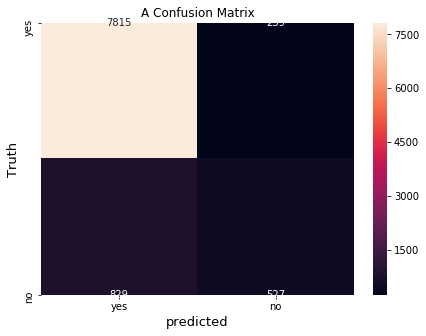

In [52]:
ConfusionMatrix(y_test, lightgbm_predict, label=['yes', 'no'])

In [53]:
metrics.accuracy_score(y_test, lightgbm_predict)

0.8865037194473964